In [73]:
import json 
import os 
import ast
import matplotlib.pyplot as plt


In [63]:
def parse_log_file(log_text: str) -> dict:
    log = {}
    lines = log_text.strip().splitlines()
    i = 0
    while i < len(lines):
        print(i)
        line = lines[i]
        if line.startswith("Executing task:"):
            log["task"] = line.replace("Executing task:", "").strip()
            log['steps'] = []
            i += 1
        elif line.startswith("Steps taken:"):
            steps_taken = int(line.split('Steps taken:')[1].split(',')[0].strip())
            goal_achieved = line.split('Steps taken:')[1].split(',')[1].strip()
            log["steps_taken"] = steps_taken
            log["goal_achieved"] = goal_achieved
            break
        elif line.startswith("Step "):
            # print(line)
            step_num = int(line.split('Step')[1].split(':')[0].strip())
            step = line.split('Step')[1].split(':')[1].strip()
            line = lines[i+1]
            reason = line.split('Reason:')[1].strip()
            # print(line)
            line = lines[i+2]
            function_name = line.split('Function Name:')[1].split('Function Args:')[0].strip()
            function_args = line.split('Function Name:')[1].split('Function Args:')[1].strip()
            line = lines[i+3]
            subtasks = line.split('Subtasks:')[1].strip()
            line = lines[i+4]
            subtasks_solved = line.split('Subtasks Solved:')[1].strip()
            line = lines[i+5]
            subtasks_solved_reason = line.split('Subtasks Solved Reason:')[1].strip()
            i+=6
            print(subtasks)
            print(subtasks_solved)
            print(subtasks_solved_reason)
            log["steps"].append({
                "step_num": step_num,
                "step": step,
                "reason": reason,
                "function_name": function_name,
                "function_args": function_args,
                "subtasks": ast.literal_eval(subtasks),
                "subtasks_solved": ast.literal_eval(subtasks_solved),
                "subtasks_solved_reason": ast.literal_eval(subtasks_solved_reason)
            })
        else:
            # print(line)
            i += 1
    return log




In [64]:
def get_logs(log_path):
    logs = {}
    for log_file in os.listdir(log_path):
        if log_file.startswith('log_'):
            file_path = os.path.join(log_path, log_file)
            if os.path.isfile(file_path):
                with open(file_path, 'r') as f:
                    log = parse_log_file(f.read())
                    logs[log_file] = log
    return logs

In [65]:
log_folder = 'agent_verify/WebVoyager/logs_with_subtasks/'
logs = get_logs(log_folder)
print(logs)

0
1
2
[{'task': 'Provide a recipe for vegetarian lasagna', 'constraints': ['Recipe must have more than 100 reviews', 'Recipe must have a rating of at least 4.5 stars', 'Recipe must be suitable for 6 people']}]
[False]
["Although the agent has searched for vegetarian lasagna recipes and the results include several that have more than 100 reviews and a rating of at least 4.5 stars (e.g., 'Easy Vegetarian Spinach Lasagna' and 'Vegetarian Four Cheese Lasagna'), the agent has not yet provided an actual recipe or stated whether these recipes serve at least 6 people. The subtask 'Provide a recipe for vegetarian lasagna' has not been satisfied yet."]
8
9
[{'task': 'Provide a recipe for vegetarian lasagna', 'constraints': ['Recipe must have more than 100 reviews', 'Recipe must have a rating of at least 4.5 stars', 'Recipe must be suitable for 6 people']}]
[True]
["The task requested a vegetarian lasagna recipe with more than 100 reviews, a rating of at least 4.5 stars, and suitable for 6 people

In [66]:
logs.keys()

dict_keys(['log_Allrecipes--0.txt', 'log_Allrecipes--1.txt', 'log_Allrecipes--10.txt', 'log_Allrecipes--11.txt', 'log_Allrecipes--12.txt', 'log_Allrecipes--13.txt', 'log_Allrecipes--14.txt', 'log_Allrecipes--15.txt', 'log_Allrecipes--16.txt', 'log_Allrecipes--17.txt', 'log_Allrecipes--18.txt', 'log_Allrecipes--19.txt', 'log_Allrecipes--2.txt', 'log_Allrecipes--20.txt', 'log_Allrecipes--21.txt', 'log_Allrecipes--22.txt', 'log_Allrecipes--23.txt', 'log_Allrecipes--24.txt', 'log_Allrecipes--25.txt', 'log_Allrecipes--26.txt', 'log_Allrecipes--27.txt', 'log_Allrecipes--28.txt', 'log_Allrecipes--29.txt', 'log_Allrecipes--3.txt', 'log_Allrecipes--30.txt', 'log_Allrecipes--31.txt', 'log_Allrecipes--32.txt', 'log_Allrecipes--33.txt', 'log_Allrecipes--34.txt', 'log_Allrecipes--35.txt', 'log_Allrecipes--36.txt', 'log_Allrecipes--37.txt', 'log_Allrecipes--38.txt', 'log_Allrecipes--39.txt', 'log_Allrecipes--4.txt', 'log_Allrecipes--40.txt', 'log_Allrecipes--41.txt', 'log_Allrecipes--42.txt', 'log_A

In [76]:
analysis = {}
for key in logs.keys():
    log = logs[key]
    goal_achieved = log['goal_achieved']
    original_subtasks = len(log['steps'][0]['subtasks_solved'])
    subtasks_unsolved_before_last_step = len(log['steps'][-1]['subtasks_solved'])
    subtasks_unsolved_after_last_step = 0
    for i in range(subtasks_unsolved_before_last_step):
        if not log['steps'][-1]['subtasks_solved'][i]:
            subtasks_unsolved_after_last_step += 1
    analysis[key] = {'goal_achieved': goal_achieved, 'subtasks_unsolved': subtasks_unsolved_after_last_step, 'original_subtasks': original_subtasks}

In [77]:
print(analysis)

{'log_Allrecipes--0.txt': {'goal_achieved': 'Goal Achieved: False', 'subtasks_unsolved': 0, 'original_subtasks': 1}, 'log_Allrecipes--1.txt': {'goal_achieved': 'Goal Achieved: True', 'subtasks_unsolved': 0, 'original_subtasks': 1}, 'log_Allrecipes--10.txt': {'goal_achieved': 'Goal Achieved: False', 'subtasks_unsolved': 3, 'original_subtasks': 4}, 'log_Allrecipes--11.txt': {'goal_achieved': 'Goal Achieved: True', 'subtasks_unsolved': 0, 'original_subtasks': 1}, 'log_Allrecipes--12.txt': {'goal_achieved': 'Goal Achieved: True', 'subtasks_unsolved': 0, 'original_subtasks': 2}, 'log_Allrecipes--13.txt': {'goal_achieved': 'Goal Achieved: False', 'subtasks_unsolved': 1, 'original_subtasks': 3}, 'log_Allrecipes--14.txt': {'goal_achieved': 'Goal Achieved: True', 'subtasks_unsolved': 0, 'original_subtasks': 1}, 'log_Allrecipes--15.txt': {'goal_achieved': 'Goal Achieved: True', 'subtasks_unsolved': 0, 'original_subtasks': 4}, 'log_Allrecipes--16.txt': {'goal_achieved': 'Goal Achieved: False', 's

In [78]:
data = analysis

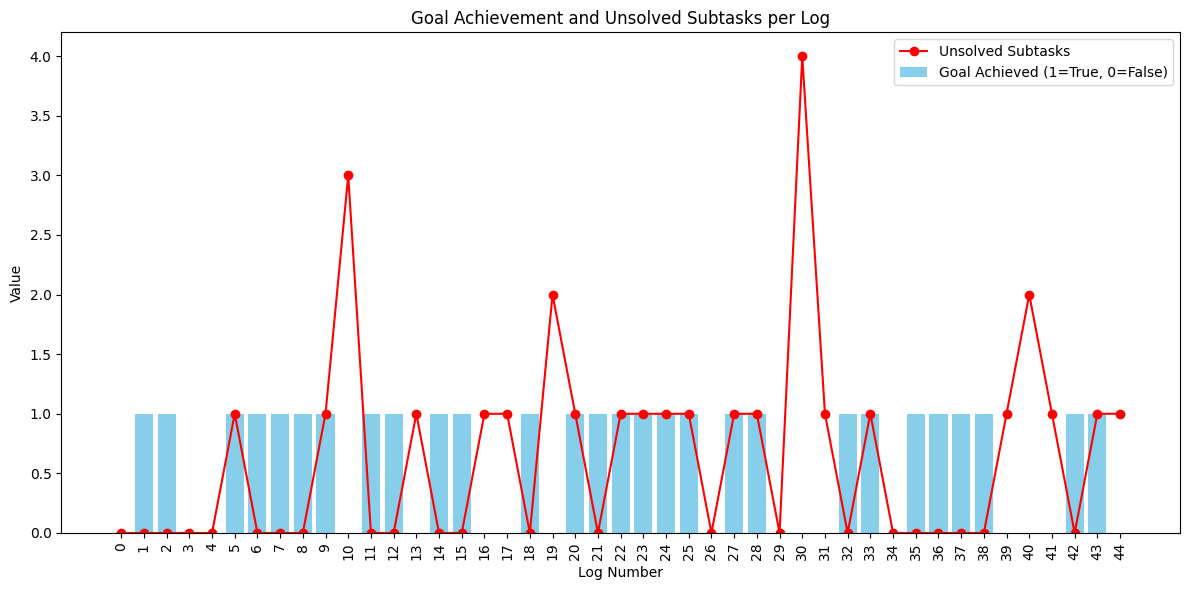

In [75]:
sorted_items = sorted(data.items(), key=lambda x: int(x[0].split('--')[1].split('.')[0]))

log_ids = []
goal_achieved = []
subtasks_unsolved = []

for log, info in sorted_items:
    log_num = int(log.split('--')[1].split('.')[0])
    log_ids.append(log_num)
    goal_achieved.append(1 if info['goal_achieved'] == 'Goal Achieved: True' else 0)
    subtasks_unsolved.append(info['subtasks_unsolved'])

# Step 2: Plot
plt.figure(figsize=(12, 6))

# Bar plot for goal achievement
plt.bar(log_ids, goal_achieved, color='skyblue', label='Goal Achieved (1=True, 0=False)')

# Line plot for subtasks unsolved
plt.plot(log_ids, subtasks_unsolved, color='red', marker='o', label='Unsolved Subtasks')

# Formatting
plt.xlabel('Log Number')
plt.ylabel('Value')
plt.title('Goal Achievement and Unsolved Subtasks per Log')
plt.xticks(log_ids, rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

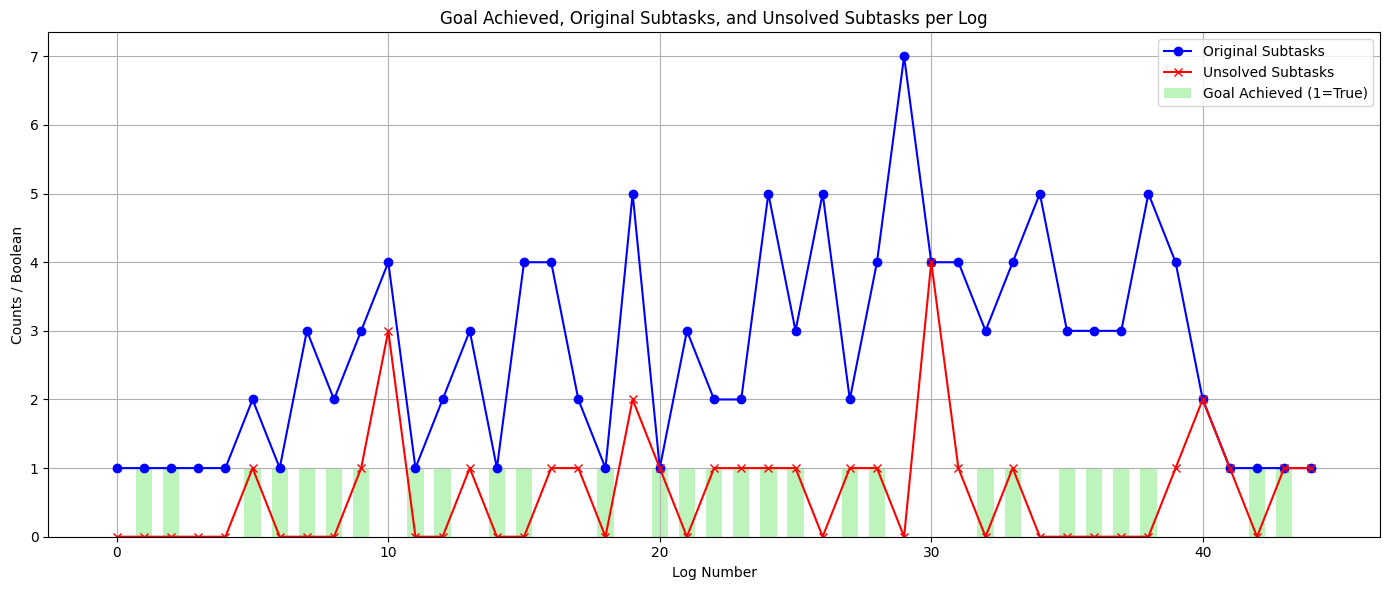

In [80]:
sorted_items = sorted(data.items(), key=lambda x: int(x[0].split('--')[1].split('.')[0]))

log_ids = []
goal_achieved = []
original_subtasks = []
unsolved_subtasks = []

for log, info in sorted_items:
    log_num = int(log.split('--')[1].split('.')[0])
    log_ids.append(log_num)
    goal_achieved.append(1 if info['goal_achieved'] == 'Goal Achieved: True' else 0)
    original_subtasks.append(info['original_subtasks'])
    unsolved_subtasks.append(info['subtasks_unsolved'])

# Plot
plt.figure(figsize=(14, 6))

# Bar for goal achieved
plt.bar(log_ids, goal_achieved, color='lightgreen', label='Goal Achieved (1=True)', width=0.6, alpha=0.6)

# Line plots
plt.plot(log_ids, original_subtasks, color='blue', marker='o', label='Original Subtasks')
plt.plot(log_ids, unsolved_subtasks, color='red', marker='x', label='Unsolved Subtasks')

# Formatting
plt.xlabel('Log Number')
plt.ylabel('Counts / Boolean')
plt.title('Goal Achieved, Original Subtasks, and Unsolved Subtasks per Log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()